# 📘 Pre-entrega

**Nombre del alumno:** Aldana Rojas
__________________________

## 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

### 1️⃣ Carga de datos

In [182]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import os
os.listdir("/content/drive/MyDrive/Aldana Rojas - Comisión 25262 - TPI Data Analytics/datasets")
['clientes.csv',
'marketing.csv',
 'ventas.csv']

url_ventas = "/content/drive/MyDrive/Aldana Rojas - Comisión 25262 - TPI Data Analytics/datasets/ventas.csv"
url_clientes = "/content/drive/MyDrive/Aldana Rojas - Comisión 25262 - TPI Data Analytics/datasets/clientes.csv"
url_marketing = "/content/drive/MyDrive/Aldana Rojas - Comisión 25262 - TPI Data Analytics/datasets/marketing.csv"

ventas = pd.read_csv(url_ventas)
clientes = pd.read_csv(url_clientes)
marketing = pd.read_csv(url_marketing)

# Verificamos que los CSV se cargaron correctamente
print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

# Mostramos las primeras filas de los datasets
display(ventas.head(2))
display(clientes.head(2))
display(marketing.head(2))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024


### 2️⃣ Análisis exploratorio inicial



In [183]:
def eda(csv, nombre):
  #Nombre del dataframe
  print (f"== {nombre} ==")

  #Mostrar la cantidad de filas y columnas
  print("shape", csv.shape)
  #Mostrar los nombres de las columnas
  print ("Columnas", list(csv.columns))

  print ("\nTipo de datos")
  #Mostrar el tipo de dato de cada olumna
  print (csv.dtypes)

  #Mostrar cantidad de datos nulos
  print("\nNulos por columna")
  print(csv.isna().sum())

  print("\nDescribe numericos")
  display(csv.describe(include='number'))

  print ("-"*100)

In [184]:
eda(ventas, "VENTAS (inicial)")
eda(clientes, "clientes (inicial)")
eda(marketing, "marketing (inicial)")

== VENTAS (inicial) ==
shape (3035, 6)
Columnas ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']

Tipo de datos
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Describe numericos


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------
== clientes (inicial) ==
shape (567, 5)
Columnas ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']

Tipo de datos
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Describe numericos


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------
== marketing (inicial) ==
shape (90, 6)
Columnas ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']

Tipo de datos
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Describe numericos


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


### 3️⃣ Calidad de los datos



In [185]:
import pandas as pd
from IPython.display import display

def analisis_df(df, nombre, clave=None):

    print(f"==================================================")
    print(f" CALIDAD DE DATOS: {nombre}")
    print(f"==================================================")

    # 1. Nulos Totales
    nulos_totales = df.isna().sum().sum()
    print(f"1️⃣ TOTAL DE VALORES NULOS (sumatoria): {nulos_totales}")

    if nulos_totales > 0:
        # Identificar qué columnas tienen nulos y su porcentaje
        nulos_col = df.isna().sum()
        cols_con_nulos = nulos_col[nulos_col > 0]

        # Formatear el resultado como 'Columna (X%)'
        reporte_nulos = [
            f"{col} ({round(count / len(df) * 100, 2)}%)"
            for col, count in cols_con_nulos.items()
        ]
        print(f"   -> Columnas Afectadas: {', '.join(reporte_nulos)}")
    else:
        print("   -> ¡Perfecto! No hay nulos detectados.")

    # 2. Duplicados de Fila
    dup_rows_count = df.duplicated(keep='first').sum()
    print(f"\n2️⃣ FILAS COMPLETAMENTE DUPLICADAS (copias a eliminar): {dup_rows_count}")

    # 3. Duplicados por Clave
    if clave and clave in df.columns:
        dup_key_count = df[clave].duplicated(keep=False).sum()

        if dup_key_count > 0:
            print(f"3️⃣ DUPLICADOS EN CLAVE '{clave}' (ocurrencias): {dup_key_count}")

            # Obtener el top de valores repetidos
            top_duplicados = df[df[clave].duplicated(keep='first')][clave].value_counts()

            print(f"   -> Top 5 Claves más repetidas (copias):")
            # Mostrar una mini-tabla solo de los valores repetidos
            display(top_duplicados.head(5).to_frame('Repeticiones'))
        else:
            print(f"3️⃣ Duplicados en Clave '{clave}': 0 (Clave única)")

    elif clave:
        print(f"3️⃣ Aviso: La columna clave '{clave}' no existe en el DataFrame.")

    print("-" * 50)

In [186]:
analisis_df(clientes, "CLIENTES", clave="id_cliente")
analisis_df(marketing, "MARKETIN", clave="id_campanha")
analisis_df(ventas,"VENTAS", clave="id_venta")

 CALIDAD DE DATOS: CLIENTES
1️⃣ TOTAL DE VALORES NULOS (sumatoria): 0
   -> ¡Perfecto! No hay nulos detectados.

2️⃣ FILAS COMPLETAMENTE DUPLICADAS (copias a eliminar): 0
3️⃣ Duplicados en Clave 'id_cliente': 0 (Clave única)
--------------------------------------------------
 CALIDAD DE DATOS: MARKETIN
1️⃣ TOTAL DE VALORES NULOS (sumatoria): 0
   -> ¡Perfecto! No hay nulos detectados.

2️⃣ FILAS COMPLETAMENTE DUPLICADAS (copias a eliminar): 0
3️⃣ Duplicados en Clave 'id_campanha': 0 (Clave única)
--------------------------------------------------
 CALIDAD DE DATOS: VENTAS
1️⃣ TOTAL DE VALORES NULOS (sumatoria): 4
   -> Columnas Afectadas: precio (0.07%), cantidad (0.07%)

2️⃣ FILAS COMPLETAMENTE DUPLICADAS (copias a eliminar): 35
3️⃣ DUPLICADOS EN CLAVE 'id_venta' (ocurrencias): 70
   -> Top 5 Claves más repetidas (copias):


,Repeticiones
id_venta,
56,1
421,1
424,1
1868,1
2545,1


--------------------------------------------------


## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

1️⃣ Limpieza de datos

In [187]:

def limpiar_dataframe(df, nombre):
    """
    Función que ejecuta todos los pasos de limpieza (duplicados, texto, tipos)
    en un DataFrame dado. Retorna el DF limpio.
    """
    df_copia = df.copy()
    print(f"--- Limpiando {nombre} ---")

    # 1. Eliminar duplicados de fila (Keep 'first' deja la primera ocurrencia)
    dups_antes = df_copia.duplicated().sum()
    df_copia.drop_duplicates(inplace=True)
    print(f"✅ Duplicados eliminados: {dups_antes}")

    # 2. Normalizar Texto (función de la profe, aplicada localmente)
    for col in df_copia.select_dtypes(include="object").columns:
        df_copia[col] = (
            df_copia[col].astype(str).str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            .str.replace(" +", " ", regex=True)
            .str.title()
        )

    # 3. Normalizar Fechas
    for col in df_copia.columns:
        if "fecha" in col.lower():
            df_copia[col] = pd.to_datetime(df_copia[col], errors="coerce", dayfirst=True)

    # 4. Conversión Numérica (Específico para VENTAS)
    if nombre == "VENTAS":
        if "precio" in df_copia.columns:
            # Reemplazo alternativo: Usar .replace con expresión regular para mayor robustez
            df_copia["precio"] = (
                df_copia["precio"].astype(str)
                .str.replace(r'[^\d\.]', '', regex=True) # Mantiene solo dígitos y puntos
            )
            df_copia["precio"] = pd.to_numeric(df_copia["precio"], errors="coerce")

        if "cantidad" in df_copia.columns:
            df_copia["cantidad"] = pd.to_numeric(df_copia["cantidad"], errors="coerce").astype("Int64")

    # 5. Conversión Numérica (General)
    if "ingresos" in df_copia.columns: # CLIENTES
        df_copia["ingresos"] = pd.to_numeric(df_copia["ingresos"], errors="coerce")
    if "costo" in df_copia.columns: # MARKETING
        df_copia["costo"] = pd.to_numeric(df_copia["costo"], errors="coerce")

    print(f"✅ Limpieza y conversión de tipos completada.")
    return df_copia


In [188]:
# -------------------------------------------------
# 2. Aplicar la Limpieza
# -------------------------------------------------
ventas_clean = limpiar_dataframe(ventas, "VENTAS")
clientes_clean = limpiar_dataframe(clientes, "CLIENTES")
marketing_clean = limpiar_dataframe(marketing, "MARKETING")

--- Limpiando VENTAS ---
✅ Duplicados eliminados: 35
✅ Limpieza y conversión de tipos completada.
--- Limpiando CLIENTES ---
✅ Duplicados eliminados: 0
✅ Limpieza y conversión de tipos completada.
--- Limpiando MARKETING ---
✅ Duplicados eliminados: 0
✅ Limpieza y conversión de tipos completada.


In [189]:
def reporte_calidad_global(dfs, nombres):
    """
    Resumen comparativo de calidad de múltiples DataFrames.

    Parámetros:
      dfs: Lista de DataFrames (limpios o originales).
      nombres: Lista de nombres correspondientes.
    """
    resumen = []

    for df, nombre in zip(dfs, nombres):
        # Total de valores nulos en todo el DataFrame
        nulos = df.isna().sum().sum()
        # Total de filas duplicadas (keep=False cuenta todas las ocurrencias, incluyendo la original)
        duplicados = df.duplicated(keep=False).sum()
        columnas = len(df.columns)
        filas = len(df)

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    return reporte

    # =========================================================================================
# ⚠️ ASUME QUE LAS VARIABLES ESTÁN CARGADAS EN MEMORIA:
#    ventas, clientes, marketing (Originales)
#    ventas_clean, clientes_clean, marketing_clean (Limpios, después de tu limpieza)
# =========================================================================================

# 1. Generar el reporte de los datos ORIGINALES
reporte_original = reporte_calidad_global(
    dfs=[ventas, clientes, marketing],
    nombres=["VENTAS Original", "CLIENTES Original", "MARKETING Original"]
)

# 2. Generar el reporte de los datos LIMPIOS
reporte_limpio = reporte_calidad_global(
    dfs=[ventas_clean, clientes_clean, marketing_clean],
    nombres=["VENTAS Limpia", "CLIENTES Limpia", "MARKETING Limpia"]
)

print("--- REPORTE GLOBAL DE CALIDAD DE DATOS (COMPARATIVA) ---")
print("\n Estado Inicial:")
display(reporte_original)

print("\n✅ Estado Post-Limpieza:")
display(reporte_limpio)

--- REPORTE GLOBAL DE CALIDAD DE DATOS (COMPARATIVA) ---

 Estado Inicial:


,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Original,3035,6,4,70
1,CLIENTES Original,567,5,0,0
2,MARKETING Original,90,6,0,0



✅ Estado Post-Limpieza:


,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Limpia,3000,6,4,0
1,CLIENTES Limpia,567,5,0,0
2,MARKETING Limpia,90,6,0,0


### 2️⃣ Transformacion de datos

In [190]:

# Voy a utilizar mi DataFrame limpio
df_ventas = ventas_clean.copy()

# ==========================================================
# 1. CALCULAR MÉTRICAS POR REGISTRO (Ingreso = Precio * Cantidad)
# ==========================================================
# Creamos la nueva columna derivada
df_ventas['ingreso_registro'] = df_ventas['precio'] * df_ventas['cantidad']
print("✅ 1. Columna 'ingreso_registro' creada.")

# ==========================================================
# 2. AGREGACIÓN: Calcular Rendimiento Total por Producto
# ==========================================================
# Agrupamos por 'producto' para sumar los ingresos y otras métricas
rendimiento_producto = df_ventas.groupby('producto').agg(
    # Métricas de rendimiento
    ingreso_total=('ingreso_registro', 'sum'),
    unidades_vendidas=('cantidad', 'sum'),
    registros_ventas=('id_venta', 'count'),

    # Métricas de referencia
    precio_promedio=('precio', 'mean')
).reset_index()

print("✅ 2. Agregación por producto completada.")
display(rendimiento_producto.head())

# ==========================================================
# 3. CÁLCULO DEL UMBRAL: Percentil 80 (P80)
# ==========================================================
# Usamos .quantile(0.8) en la columna de ingreso total
percentil_80 = rendimiento_producto['ingreso_total'].quantile(0.80)

print(f"\n--- Umbral de Alto Rendimiento ---")
print(f"El 80% de los productos generan un ingreso total de hasta: ${percentil_80:,.2f}")
print(f"Buscamos el Top 20% que genera ingresos >= ${percentil_80:,.2f}")
print("----------------------------------")

# ==========================================================
# 4. FILTRADO y ORDENAMIENTO (Alto Rendimiento)
# ==========================================================

# Aplicar el filtro: Alto rendimiento = Ingreso_total >= P80
# Usamos el método .query() como alternativa a condiciones con operadores lógicos:
umbral_query = f"ingreso_total >= {percentil_80}"
productos_alto_rendimiento = rendimiento_producto.query(umbral_query).copy()

# Ordenar de mayor a menor ingreso total
productos_alto_rendimiento.sort_values(by='ingreso_total', ascending=False, inplace=True)

# ==========================================================
# 5. DOCUMENTACIÓN DEL RESULTADO
# ==========================================================
total_productos = len(rendimiento_producto)
productos_filtrados = len(productos_alto_rendimiento)
porcentaje_filtrado = round((productos_filtrados / total_productos) * 100, 2)

print(f"\n✅ RESULTADO FINAL DE ALTO RENDIMIENTO")
print(f"Total de productos únicos: {total_productos}")
print(f"Productos de Alto Rendimiento (Top 20%): {productos_filtrados} ({porcentaje_filtrado}%)")

display(productos_alto_rendimiento)

✅ 1. Columna 'ingreso_registro' creada.
✅ 2. Agregación por producto completada.


,producto,ingreso_total,unidades_vendidas,registros_ventas,precio_promedio
0,Adorno De Pared,48093.49,633,100,76.097800
1,Alfombra,44773.06,615,100,74.098300
2,Aspiradora,50085.86,651,100,77.447400
3,Auriculares,74175.58,958,143,76.302727
4,Batidora,50979.2,672,100,77.537200



--- Umbral de Alto Rendimiento ---
El 80% de los productos generan un ingreso total de hasta: $52,518.85
Buscamos el Top 20% que genera ingresos >= $52,518.85
----------------------------------

✅ RESULTADO FINAL DE ALTO RENDIMIENTO
Total de productos únicos: 30
Productos de Alto Rendimiento (Top 20%): 6 (20.0%)


/tmp/ipython-input-661291528.py:46: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  productos_alto_rendimiento = rendimiento_producto.query(umbral_query).copy()


,producto,ingreso_total,unidades_vendidas,registros_ventas,precio_promedio
19,Lámpara De Mesa,82276.38,1112,176,72.720625
3,Auriculares,74175.58,958,143,76.302727
20,Microondas,72562.89,912,135,79.176000
5,Cafetera,59607.31,765,117,79.046581
9,Cuadro Decorativo,54297.6,726,100,74.578000
26,Smartphone,54132.44,665,101,81.398416


### 3️⃣ Agregacion

In [191]:
# Vamos a utilizar la columna de ingresos (creada en el punto anterior)
# df_ventas['ingreso_registro'] = df_ventas['precio'] * df_ventas['cantidad']
# Ejemplo de como fue creado anteriormente
# df_ventas_analisis = ventas_clean.copy()
# if 'ingreso_registro' not in df_ventas_analisis.columns:
#     df_ventas_analisis['ingreso_registro'] = df_ventas_analisis['precio'] * df_ventas_analisis['cantidad']

# Usaremos la variable df_ventas que se generó en el punto anterior
df_ventas_analisis = df_ventas.copy()

# ==========================================================
# 1. AGREGACIÓN: Resumen por Categoría
# ==========================================================
resumen_por_categoria = df_ventas_analisis.groupby('categoria').agg(
    # Métricas de Ingreso
    Ingreso_Total=('ingreso_registro', 'sum'),
    Ingreso_Promedio_Venta=('ingreso_registro', 'mean'),

    # Métricas de Volumen
    Unidades_Vendidas_Total=('cantidad', 'sum'),
    Total_Transacciones=('id_venta', 'count')

).reset_index()

# ==========================================================
# 2. TRANSFORMACIÓN: Cálculo del % de Ingreso Total
# ==========================================================
# Esto permite identificar rápidamente la categoría más importante
total_general_ingreso = resumen_por_categoria['Ingreso_Total'].sum()

resumen_por_categoria['Porcentaje_Ingreso'] = (
    (resumen_por_categoria['Ingreso_Total'] / total_general_ingreso) * 100
)

# ==========================================================
# 3. ORDENAMIENTO y DOCUMENTACIÓN
# ==========================================================
# Ordenamos para ver la categoría líder primero
resumen_por_categoria.sort_values(
    by='Ingreso_Total',
    ascending=False,
    inplace=True
)

print(" ANÁLISIS DE RENDIMIENTO POR CATEGORÍA DE PRODUCTO")
display(resumen_por_categoria.head(10).style.format({
    'Ingreso_Total': '€ {:,.2f}',
    'Ingreso_Promedio_Venta': '€ {:,.2f}',
    'Porcentaje_Ingreso': '{:.2f}%',
    'Unidades_Vendidas_Total': '{:,.0f}'
}))

 ANÁLISIS DE RENDIMIENTO POR CATEGORÍA DE PRODUCTO


,categoria,Ingreso_Total,Ingreso_Promedio_Venta,Unidades_Vendidas_Total,Total_Transacciones,Porcentaje_Ingreso
1,Electrodomésticos,"€ 505,299.63",€ 505.30,"6,592",1000,34.44%
2,Electrónica,"€ 482,577.80",€ 483.54,"6,413",999,32.89%
0,Decoración,"€ 479,216.09",€ 479.22,"6,490",1001,32.66%


### **4 **Integración de datos, opcional, NO OBLIGATORIO

In [192]:
# TODO: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
# Sugerencia: usar pd.merge() especificando la clave común entre ambos DataFrames.
# Documentar cualquier observación relevante sobre la combinación de datos.


## 🧩 Etapa 3: Analisis de datos
**Objetivo:** Realizar análisis estadístico y exploratorio sobre los datos procesados.

1️⃣ Estadistica descriptiva


 ESTADÍSTICA DESCRIPTIVA: Ingreso Total por Producto
✅ Medidas de Tendencia Central y Dispersión:


,count,mean,std,min,25%,50%,75%,max,Rango
Valor,$30.00,"$48,903.12","$13,265.56","$11,128.80","$45,601.92","$48,140.24","$51,092.96","$82,276.38","$71,147.58"


--- Detección de Outliers en ingreso_total (Regla 1.5 * IQR) ---
  > Rango Intercuartílico (IQR): $5,491.04
  > Límite Superior: $59,329.52
🚨 Se detectaron 7 outliers (Ingreso Excepcional):


,producto,ingreso_total
19,Lámpara De Mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
28,Tablet,25856.57
14,Heladera,25736.8
6,Candelabro,11128.8


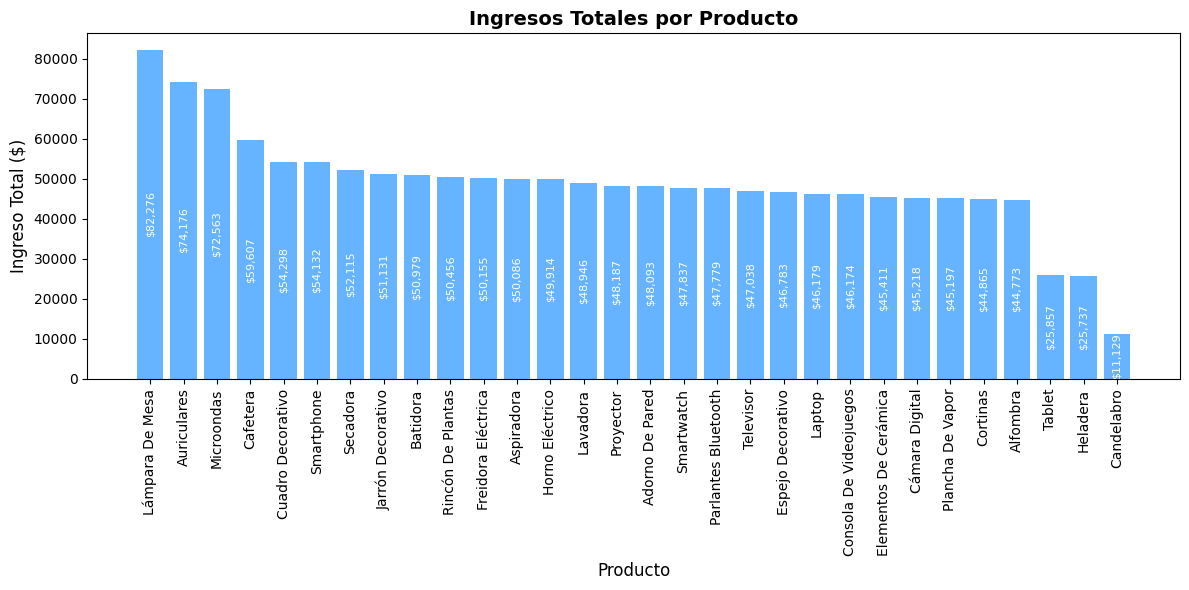

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# El DataFrame 'rendimiento_producto' es el resultado
# de la agregación de ingreso_total por producto (Etapa 2.2-Transformación de Datos).
df_ingresos = rendimiento_producto.copy()

# ==============================================================
## 1. Función para Detección de Outliers por IQR
# ==============================================================

def detectar_outliers_iqr(df, columna, factor=1.5):
    """Calcula y reporta los outliers de una columna usando el método IQR."""

    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - factor * IQR
    lim_sup = Q3 + factor * IQR

    outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)].copy()

    print(f"--- Detección de Outliers en {columna} (Regla 1.5 * IQR) ---")
    print(f"  > Rango Intercuartílico (IQR): ${IQR:,.2f}")
    print(f"  > Límite Superior: ${lim_sup:,.2f}")

    if not outliers.empty:
        print(f"🚨 Se detectaron {len(outliers)} outliers (Ingreso Excepcional):")
        display(outliers[['producto', columna]].sort_values(columna, ascending=False))
    else:
        print("✅ No se detectaron outliers.")
    return outliers

# ==============================================================
## 2. Reporte de Estadística Descriptiva (Medidas y Dispersión)
# ==============================================================

print("==================================================")
print(" ESTADÍSTICA DESCRIPTIVA: Ingreso Total por Producto")
print("==================================================")

# Usamos .describe() para obtener todas las medidas automáticamente
reporte_estadistico = df_ingresos['ingreso_total'].describe().to_frame()

# Calculamos y agregamos el Rango (Máx - Mín) para la tabla
rango = df_ingresos['ingreso_total'].max() - df_ingresos['ingreso_total'].min()

# Preparamos el DataFrame del reporte
reporte_estadistico = reporte_estadistico.rename(
    columns={'ingreso_total': 'Valor'}
).T

reporte_estadistico['Rango'] = rango

print("✅ Medidas de Tendencia Central y Dispersión:")
display(reporte_estadistico.style.format('${:,.2f}'))

# Ejecutar la Detección de Outliers
outliers_detectados = detectar_outliers_iqr(df_ingresos, 'ingreso_total')

# ==============================================================
## 3. Gráfico de Barras (Visualización de Dispersión)
# ==============================================================

# Ordenamos el DataFrame para el gráfico
df_ordenado = df_ingresos.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(12, 6))
color_celeste = "#66b3ff"

barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Ingreso Total ($)", fontsize=12)
plt.xticks(rotation=90)

# Agregamos etiquetas dentro de las barras (lógica concisa)
for barra in barras:
    yval = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        yval / 2,
        f"${yval:,.0f}",
        ha='center', va='center', fontsize=8, color="white", rotation=90
    )

plt.tight_layout()
plt.show()

### 2️⃣ Análisis Exploratorio de Datos (EDA)

 1. DISTRIBUCIÓN DE INGRESOS POR REGISTRO (Histograma)


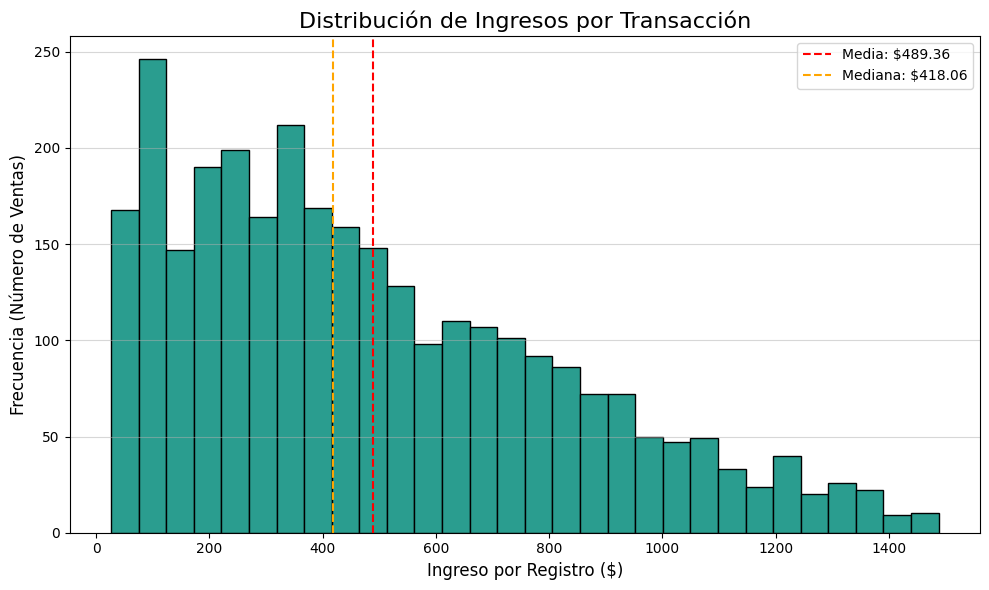


✅ Comportamiento de las Ventas
- Concentración de Ventas: La mayor frecuencia de ventas (la barra más alta) se concentra en el rango de ingresos más bajo (aprox. $0 a $500). 
Esto indica que la base del negocio está en las transacciones de bajo a medio valor.
- Ventas de Alto Valor: La frecuencia disminuye a medida que el ingreso por registro aumenta (más allá de $800). 
Sin embargo, la presencia de estas barras hasta $1400 confirma que, aunque son pocas, las ventas de alto ingreso son las que más contribuyen a la Media y al ingreso total de la empresa.

Conclusion:
Las transacciones de alto valor son menos frecuentes pero muy rentables. Es importante analizar qué productos o estrategias están detrás de esas ventas para intentar replicarlas.


In [194]:
import matplotlib.pyplot as plt
import numpy as np

# Usamos el DataFrame de ventas a nivel de registro
df_ventas_analisis = ventas_clean.copy()

# Nos aseguramos que el ingreso por registro exista
if 'ingreso_registro' not in df_ventas_analisis.columns:
    df_ventas_analisis['ingreso_registro'] = df_ventas_analisis['precio'] * df_ventas_analisis['cantidad']

print("==================================================")
print(" 1. DISTRIBUCIÓN DE INGRESOS POR REGISTRO (Histograma)")
print("==================================================")

# Definir el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma
# bins=30 divide el rango de datos en 30 contenedores (barras)
plt.hist(df_ventas_analisis['ingreso_registro'], bins=30, color='#2a9d8f', edgecolor='black')

plt.title('Distribución de Ingresos por Transacción', fontsize=16)
plt.xlabel('Ingreso por Registro ($)', fontsize=12)
plt.ylabel('Frecuencia (Número de Ventas)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Calcular y mostrar la media y la mediana en el gráfico para referencia
media = df_ventas_analisis['ingreso_registro'].mean()
mediana = df_ventas_analisis['ingreso_registro'].median()

# Línea vertical para la Media (roja)
plt.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: ${media:,.2f}')
# Línea vertical para la Mediana (naranja)
plt.axvline(mediana, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mediana: ${mediana:,.2f}')

plt.legend()
plt.tight_layout()
plt.show()

print("\n✅ Comportamiento de las Ventas")
print("- Concentración de Ventas: La mayor frecuencia de ventas (la barra más alta) se concentra en el rango de ingresos más bajo (aprox. $0 a $500). \nEsto indica que la base del negocio está en las transacciones de bajo a medio valor.")
print("- Ventas de Alto Valor: La frecuencia disminuye a medida que el ingreso por registro aumenta (más allá de $800). \nSin embargo, la presencia de estas barras hasta $1400 confirma que, aunque son pocas, las ventas de alto ingreso son las que más contribuyen a la Media y al ingreso total de la empresa.")

print("\n============")
print("Conclusion:")
print("============")
print("Las transacciones de alto valor son menos frecuentes pero muy rentables. Es importante analizar qué productos o estrategias están detrás de esas ventas para intentar replicarlas.")


 2. TENDENCIA DE VENTAS (Serie Temporal Mensual)


/tmp/ipython-input-541530518.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df_ventas_analisis.set_index('fecha_venta').resample('M')['ingreso_registro'].sum().reset_index()


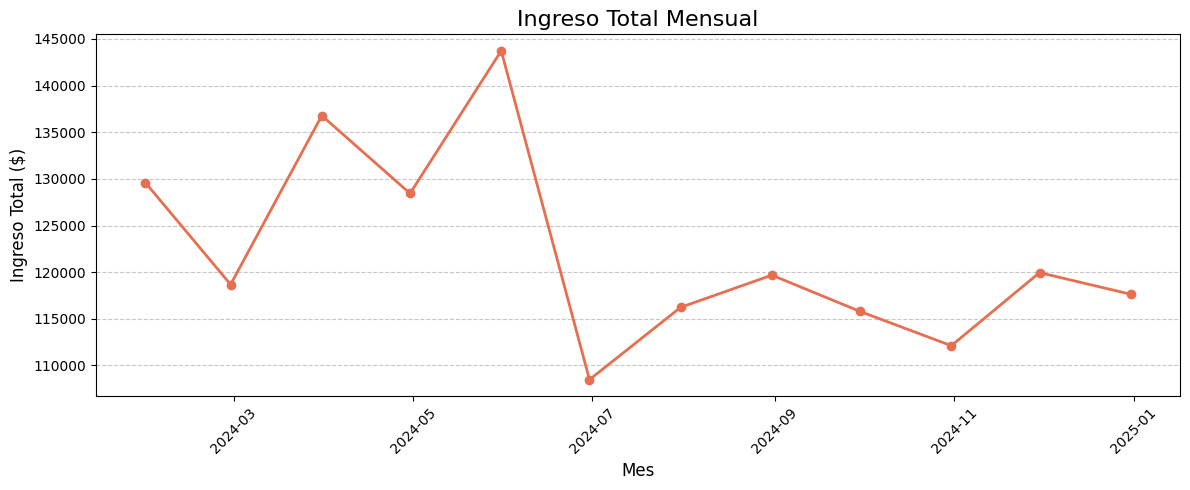


Conclusion

El gráfico de Ingresos Totales Mensuales muestra la evolución de nuestras ventas a lo largo de 11 meses. 
Esto nos permite entender cuándo vendemos más y si el negocio está creciendo o desacelerándose.

El mes de Junio genero el ingreso máximo (cerca de $144,000). Este fue el mes de temporada alta. 
El negocio experimentó una desaceleración o pérdida de impulso en la segunda mitad del año (Julio). Este seria el inicio de temporada baja
Se observa una ligera recuperación al final del año, pero este pico no fue suficiente para alcanzar el nivel de ventas que se tuvieron en Marzo o Junio


In [195]:
if 'fecha_venta' in df_ventas_analisis.columns:
    df_ventas_analisis['fecha_venta'] = pd.to_datetime(df_ventas_analisis['fecha_venta'], errors='coerce')

    print("\n==================================================")
    print(" 2. TENDENCIA DE VENTAS (Serie Temporal Mensual)")
    print("==================================================")

    # 1. Preparar los datos: Agrupar por mes y sumar el ingreso total
    ventas_mensuales = df_ventas_analisis.set_index('fecha_venta').resample('M')['ingreso_registro'].sum().reset_index()

    # 2. Crear la figura
    plt.figure(figsize=(12, 5))

    # 3. Graficar la serie temporal
    plt.plot(
        ventas_mensuales['fecha_venta'],
        ventas_mensuales['ingreso_registro'],
        marker='o', # Puntos en cada mes
        linestyle='-',
        color='#e76f51',
        linewidth=2
    )

    plt.title('Ingreso Total Mensual', fontsize=16)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Ingreso Total ($)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Formatear el eje X para mostrar mejor las fechas
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

else:
    print("\n [Error] No se puede generar la Serie Temporal: Falta la columna 'fecha_venta' en el DataFrame de ventas.")

print("\n==========")
print("Conclusion")
print("============")

print("\nEl gráfico de Ingresos Totales Mensuales muestra la evolución de nuestras ventas a lo largo de 11 meses. \nEsto nos permite entender cuándo vendemos más y si el negocio está creciendo o desacelerándose.")
print("\nEl mes de Junio genero el ingreso máximo (cerca de $144,000). Este fue el mes de temporada alta. ")
print("El negocio experimentó una desaceleración o pérdida de impulso en la segunda mitad del año (Julio). Este seria el inicio de temporada baja")
print("Se observa una ligera recuperación al final del año, pero este pico no fue suficiente para alcanzar el nivel de ventas que se tuvieron en Marzo o Junio")

### 3️⃣ Correlacion

In [196]:
import pandas as pd
import numpy as np

# Usamos el DataFrame que resume las ventas por producto
df_resumen = rendimiento_producto.copy()

# 1. Calcular la correlación de Pearson entre el precio promedio del producto y el total de unidades vendidas
correlacion_producto = df_resumen['precio_promedio'].corr(df_resumen['unidades_vendidas'])

print("=========================================================")
print(" Correlación por Producto (Precio Promedio vs. Unidades)")
print("=========================================================\n")
print(f"Coeficiente de Pearson (ρ): {correlacion_producto:.4f}")

# Interpretación rápida
if correlacion_producto < -0.2:
    print("Interpretación: Correlación Negativa. A mayor precio promedio, menor volumen de venta.")
elif correlacion_producto > 0.2:
    print("Interpretación: Correlación Positiva. A mayor precio promedio, mayor volumen de venta (ej. productos de lujo).")
else:
    print("Interpretación: Correlación Débil o Nula. El precio no tiene un impacto lineal claro en el volumen vendido.")

 Correlación por Producto (Precio Promedio vs. Unidades)

Coeficiente de Pearson (ρ): 0.2168
Interpretación: Correlación Positiva. A mayor precio promedio, mayor volumen de venta (ej. productos de lujo).



Diagrama de Dispersión: Precio Promedio vs. Unidades Vendidas



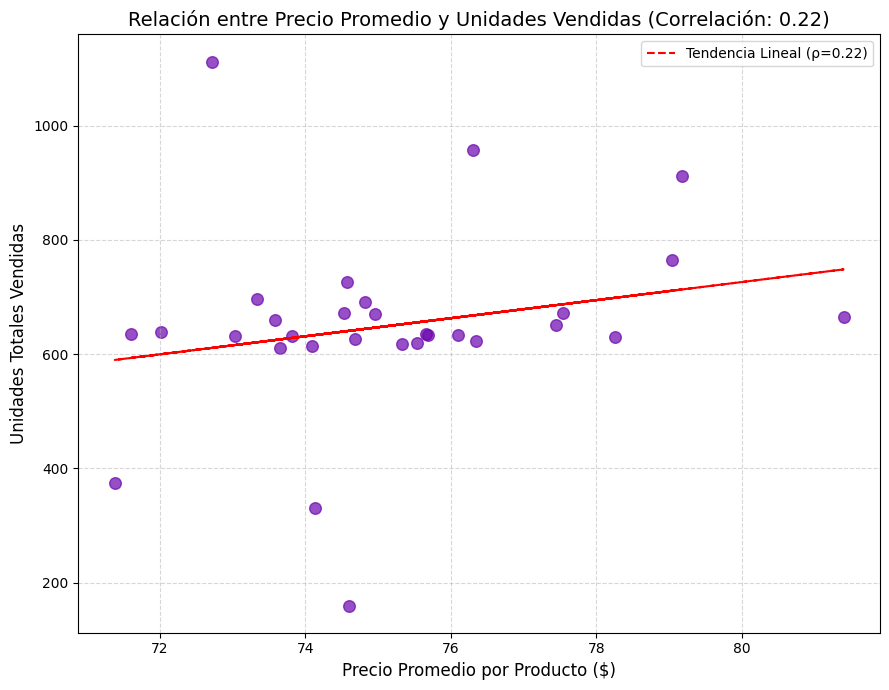

In [197]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# --- Replicamos vaores que ya calculamos anteriormente ---
df_resumen = rendimiento_producto.copy()
correlacion_producto = df_resumen['precio_promedio'].corr(df_resumen['unidades_vendidas'])
# ------------------------------------------------

print("\n==================================================")
print("Diagrama de Dispersión: Precio Promedio vs. Unidades Vendidas")
print("==================================================\n")

plt.figure(figsize=(9, 7))

# Dibujar el diagrama de dispersión
plt.scatter(
    df_resumen['precio_promedio'],
    df_resumen['unidades_vendidas'],
    alpha=0.7,
    color='#6a05ad', # Puntos de datos
    s=70 # Tamaño de los puntos
)

# --- Generar y Dibujar la Línea de Tendencia (Regresión Lineal) ---
# np.polyfit(X, Y, grado=1) calcula la pendiente y la intersección de la mejor línea recta
z = np.polyfit(df_resumen['precio_promedio'], df_resumen['unidades_vendidas'], 1)
p = np.poly1d(z)
plt.plot(
    df_resumen['precio_promedio'],
    p(df_resumen['precio_promedio']),
    "r--", # Línea roja discontinua
    label=f'Tendencia Lineal (ρ={correlacion_producto:.2f})'
)
# -----------------------------------------------------------------

# Añadir etiquetas y título
plt.title(f'Relación entre Precio Promedio y Unidades Vendidas (Correlación: {correlacion_producto:.2f})', fontsize=14)
plt.xlabel('Precio Promedio por Producto ($)', fontsize=12)
plt.ylabel('Unidades Totales Vendidas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

## 🧩 Etapa 4: Visualizacion de datos
**Objetivo:** Aprender a visualizar datos de manera efectiva utilizando diversas bibliotecas.

### 1️⃣ Visualización con Matplotlib

---------------------------------------------------------------------------------------------
1. Gráfico de Barras Apiladas: Ingreso y Unidades por Categoría (Comparación Proporcional)
---------------------------------------------------------------------------------------------

Este gráfico muestra el Ingreso Total y la Cantidad de Unidades vendidas por categoría en el mismo gráfico, permitiendo ver si una categoría vende mucho volumen 
pero poco ingreso (productos baratos) o viceversa.



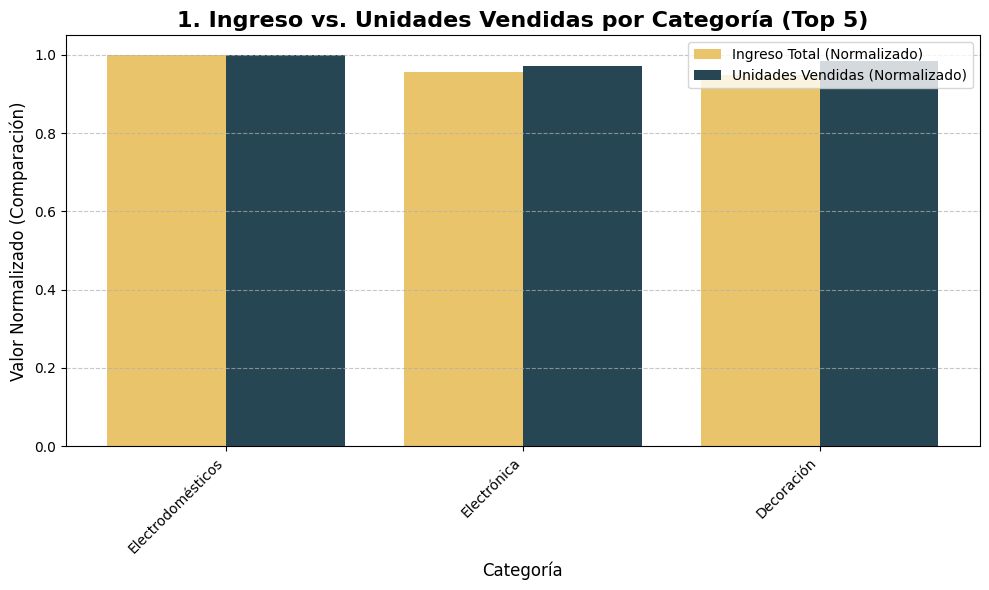

In [198]:
print("---------------------------------------------------------------------------------------------")
print("1. Gráfico de Barras Apiladas: Ingreso y Unidades por Categoría (Comparación Proporcional)")
print("---------------------------------------------------------------------------------------------")
print("\nEste gráfico muestra el Ingreso Total y la Cantidad de Unidades vendidas por categoría en el mismo gráfico, permitiendo ver si una categoría vende mucho volumen \npero poco ingreso (productos baratos) o viceversa.\n")

import matplotlib.pyplot as plt
import pandas as pd

# 1. Agregación por Categoría
# Usamos el DataFrame limpio con 'ingreso_registro'
df_ventas_clean = ventas_clean.copy()
if 'ingreso_registro' not in df_ventas_clean.columns:
    df_ventas_clean['ingreso_registro'] = df_ventas_clean['precio'] * df_ventas_clean['cantidad']

resumen_cat = df_ventas_clean.groupby('categoria').agg(
    ingreso_total=('ingreso_registro', 'sum'),
    unidades_totales=('cantidad', 'sum')
).sort_values('ingreso_total', ascending=False).head(5) # Top 5 categorías

# 2. Normalización para comparar en la misma escala (ej. entre 0 y 1)
resumen_cat['ingreso_norm'] = resumen_cat['ingreso_total'] / resumen_cat['ingreso_total'].max()
resumen_cat['unidades_norm'] = resumen_cat['unidades_totales'] / resumen_cat['unidades_totales'].max()

# 3. Graficar
categorias = resumen_cat.index
x = range(len(categorias))

plt.figure(figsize=(10, 6))

# Ingreso (Barra principal)
plt.bar(x, resumen_cat['ingreso_norm'], width=0.4, label='Ingreso Total (Normalizado)', color='#e9c46a')
# Unidades (Barra al lado)
plt.bar([i + 0.4 for i in x], resumen_cat['unidades_norm'], width=0.4, label='Unidades Vendidas (Normalizado)', color='#264653')

plt.title('1. Ingreso vs. Unidades Vendidas por Categoría (Top 5)', fontsize=16, weight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Valor Normalizado (Comparación)', fontsize=12)
plt.xticks([i + 0.2 for i in x], categorias, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. Gráfico de Caja (Box Plot): Distribución del Ingreso por Categoría

Este gráfico compara la distribución interna del ingreso por cada transacción entre las categorías, identificando qué categorías tienen ventas más estables y cuáles tienen más outliers de alto valor.



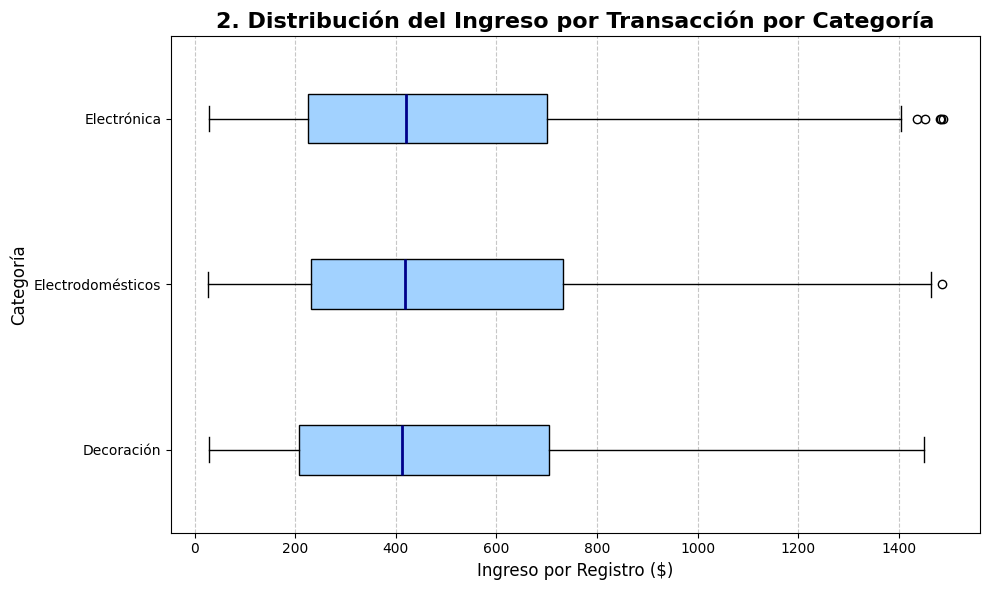

In [199]:
print("2. Gráfico de Caja (Box Plot): Distribución del Ingreso por Categoría")
print("\nEste gráfico compara la distribución interna del ingreso por cada transacción entre las categorías, identificando qué categorías tienen ventas más estables y cuáles tienen más outliers de alto valor.\n")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Usamos el DataFrame de ventas a nivel de registro
df_ventas_clean = ventas_clean.copy()

# 1. Preparación de datos (Ingreso por Registro)
datos_caja_ingreso = []
etiquetas_ingreso = []


if 'ingreso_registro' not in df_ventas_clean.columns:
    df_ventas_clean['ingreso_registro'] = df_ventas_clean['precio'] * df_ventas_clean['cantidad']

# Filtrar las 5 categorías principales
top_categorias_box = df_ventas_clean['categoria'].value_counts().head(5).index.tolist()

for categoria in top_categorias_box:
    ingresos = df_ventas_clean[df_ventas_clean['categoria'] == categoria]['ingreso_registro'].dropna()
    datos_caja_ingreso.append(ingresos)
    etiquetas_ingreso.append(categoria)

# 2. Graficar
plt.figure(figsize=(10, 6))

plt.boxplot(datos_caja_ingreso, tick_labels=etiquetas_ingreso, vert=False, patch_artist=True,
            boxprops=dict(facecolor='#a2d2ff', color='black'),
            medianprops=dict(color='darkblue', linewidth=2)
           )

plt.title('2. Distribución del Ingreso por Transacción por Categoría', fontsize=16, weight='bold')
plt.xlabel('Ingreso por Registro ($)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

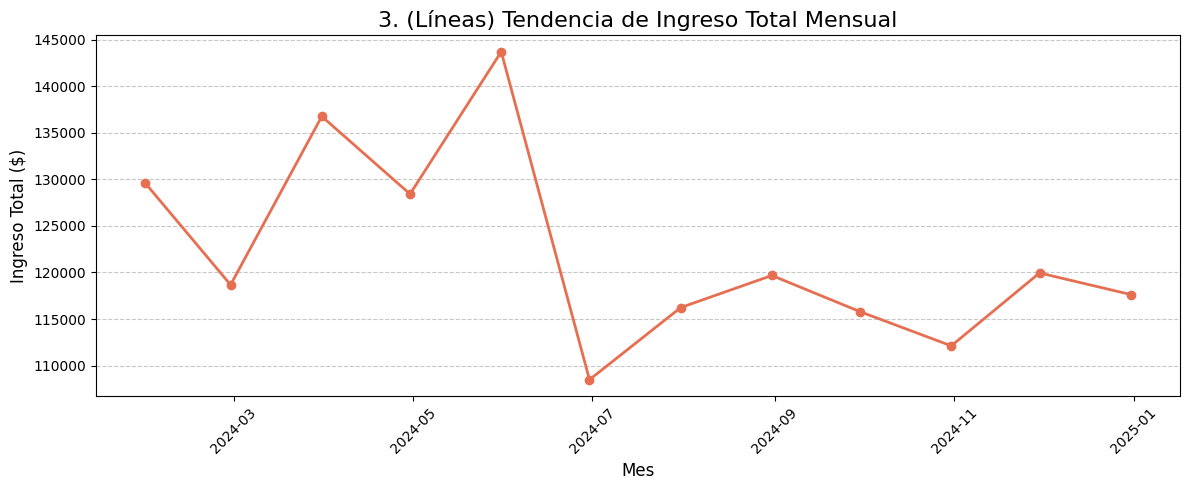

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

df_ventas_time = ventas_clean.copy()
df_ventas_time['fecha_venta'] = pd.to_datetime(df_ventas_time['fecha_venta'], errors='coerce')
if 'ingreso_registro' not in df_ventas_time.columns:
    df_ventas_time['ingreso_registro'] = df_ventas_time['precio'] * df_ventas_time['cantidad']

# Agrupación por mes (ME = Month End)
ventas_mensuales = df_ventas_time.set_index('fecha_venta').resample('ME')['ingreso_registro'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(
    ventas_mensuales['fecha_venta'],
    ventas_mensuales['ingreso_registro'],
    marker='o',
    linestyle='-',
    color='#e76f51',
    linewidth=2
)
plt.title('3. (Líneas) Tendencia de Ingreso Total Mensual', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

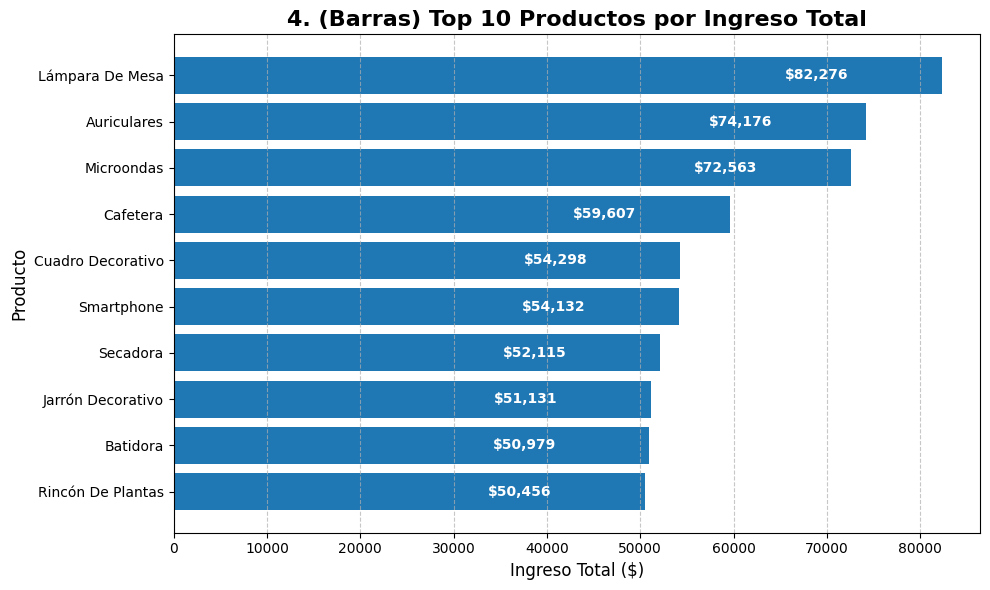

In [201]:
import matplotlib.pyplot as plt

# Usamos el DataFrame de rendimiento (ya agrupado por producto)
df_top = rendimiento_producto.copy()
df_top = df_top.sort_values('ingreso_total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
barras = plt.barh( # Barras horizontales para mejor lectura
    df_top['producto'],
    df_top['ingreso_total'],
    color='#1f77b4'
)

plt.title('4. (Barras) Top 10 Productos por Ingreso Total', fontsize=16, weight='bold')
plt.xlabel('Ingreso Total ($)', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.gca().invert_yaxis()

# Etiquetas de valor
for barra in barras:
    width = barra.get_width()
    plt.text(
        width - 10000,
        barra.get_y() + barra.get_height()/2,
        f'${width:,.0f}',
        ha='right', va='center',
        fontsize=10,
        color='white',
        weight='bold'
    )

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

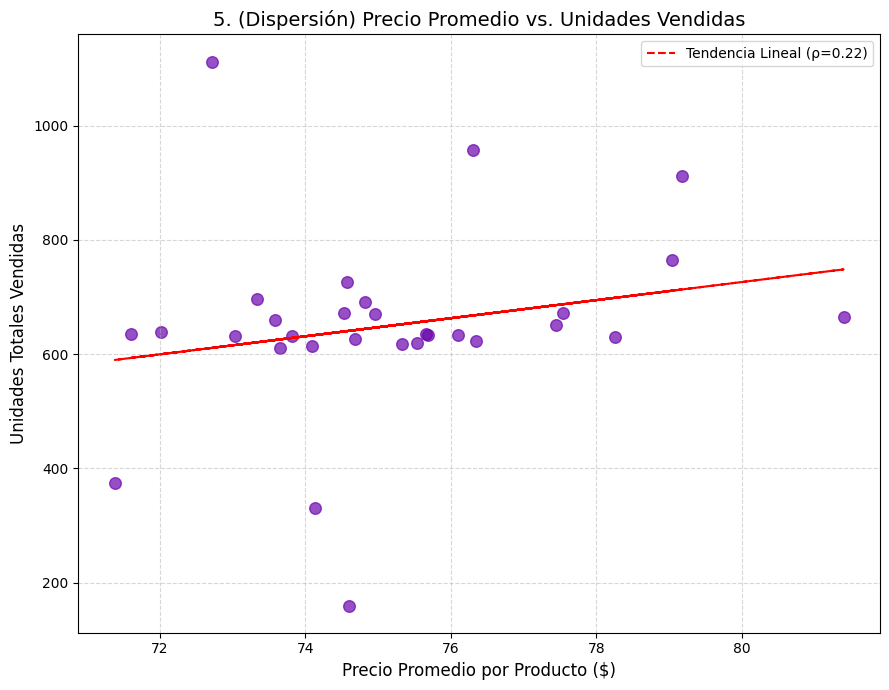

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Usamos el DataFrame de rendimiento (resumen_prod)
df_resumen = rendimiento_producto.copy()
correlacion_producto = df_resumen['precio_promedio'].corr(df_resumen['unidades_vendidas'])

plt.figure(figsize=(9, 7))

# Dibujar el diagrama de dispersión
plt.scatter(
    df_resumen['precio_promedio'],
    df_resumen['unidades_vendidas'],
    alpha=0.7,
    color='#6a05ad',
    s=70
)

# Generar y Dibujar la Línea de Tendencia
z = np.polyfit(df_resumen['precio_promedio'], df_resumen['unidades_vendidas'], 1)
p = np.poly1d(z)
plt.plot(
    df_resumen['precio_promedio'],
    p(df_resumen['precio_promedio']),
    "r--",
    label=f'Tendencia Lineal (ρ={correlacion_producto:.2f})'
)

plt.title(f'5. (Dispersión) Precio Promedio vs. Unidades Vendidas', fontsize=14)
plt.xlabel('Precio Promedio por Producto ($)', fontsize=12)
plt.ylabel('Unidades Totales Vendidas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

2️⃣ Visualización Avanzada con Seaborn

1. Histograma con KDE: Distribución de Ingresos por Registro


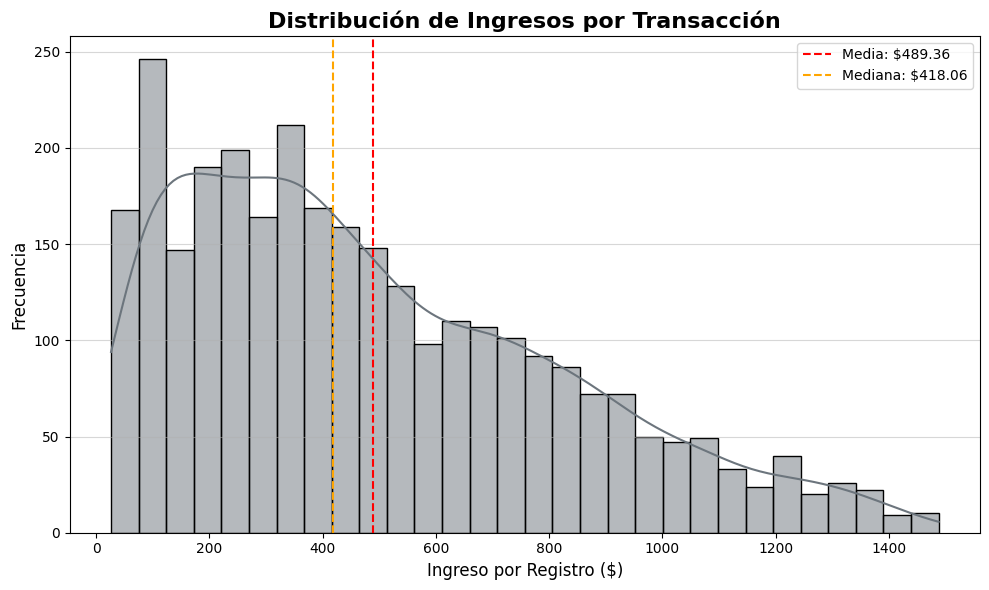

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Usamos el DataFrame de ventas a nivel de registro
df_ventas_seaborn = ventas_clean.copy()

if 'ingreso_registro' not in df_ventas_seaborn.columns:
    df_ventas_seaborn['ingreso_registro'] = df_ventas_seaborn['precio'] * df_ventas_seaborn['cantidad']

print("=============================================================")
print("1. Histograma con KDE: Distribución de Ingresos por Registro")
print("=============================================================")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_ventas_seaborn,
    x='ingreso_registro',
    bins=30,
    kde=True, # Mostrar la línea de densidad
    color='#6c757d',
    edgecolor='black'
)

# Añadir la media y mediana como líneas verticales
media = df_ventas_seaborn['ingreso_registro'].mean()
mediana = df_ventas_seaborn['ingreso_registro'].median()
plt.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: ${media:,.2f}')
plt.axvline(mediana, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mediana: ${mediana:,.2f}')
plt.legend()

plt.title('Distribución de Ingresos por Transacción', fontsize=16, weight='bold')
plt.xlabel('Ingreso por Registro ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


2. Mapa de Calor de Correlación entre Variables Numéricas


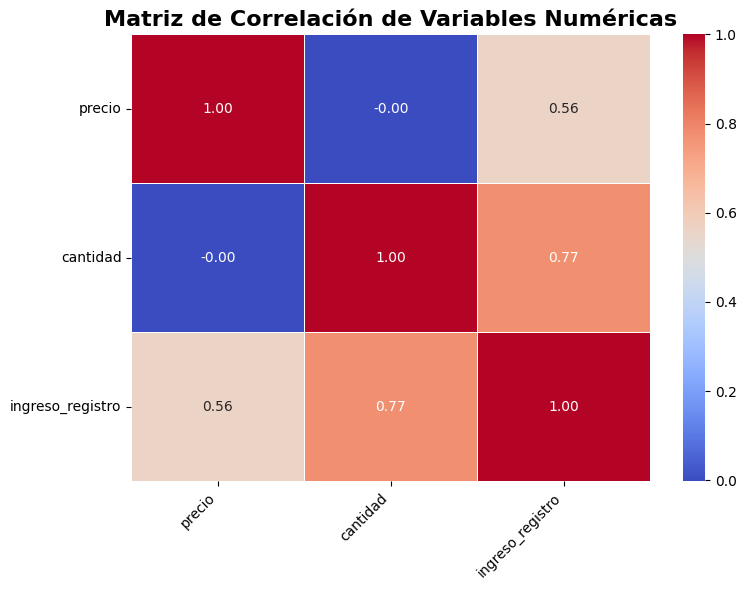

In [204]:
df_numerico = df_ventas_seaborn[['precio', 'cantidad', 'ingreso_registro']].copy()

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

print("\n========================================================")
print("2. Mapa de Calor de Correlación entre Variables Numéricas")
print("==========================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacion,
    annot=True,     # Mostrar los valores de correlación en el mapa
    cmap='coolwarm', # Paleta de colores
    fmt=".2f",      # Formato de los números a dos decimales
    linewidths=.5   # Líneas entre las celdas
)

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


3. Gráfico de Violín: Distribución de Ingresos por Categoría (Revisado)


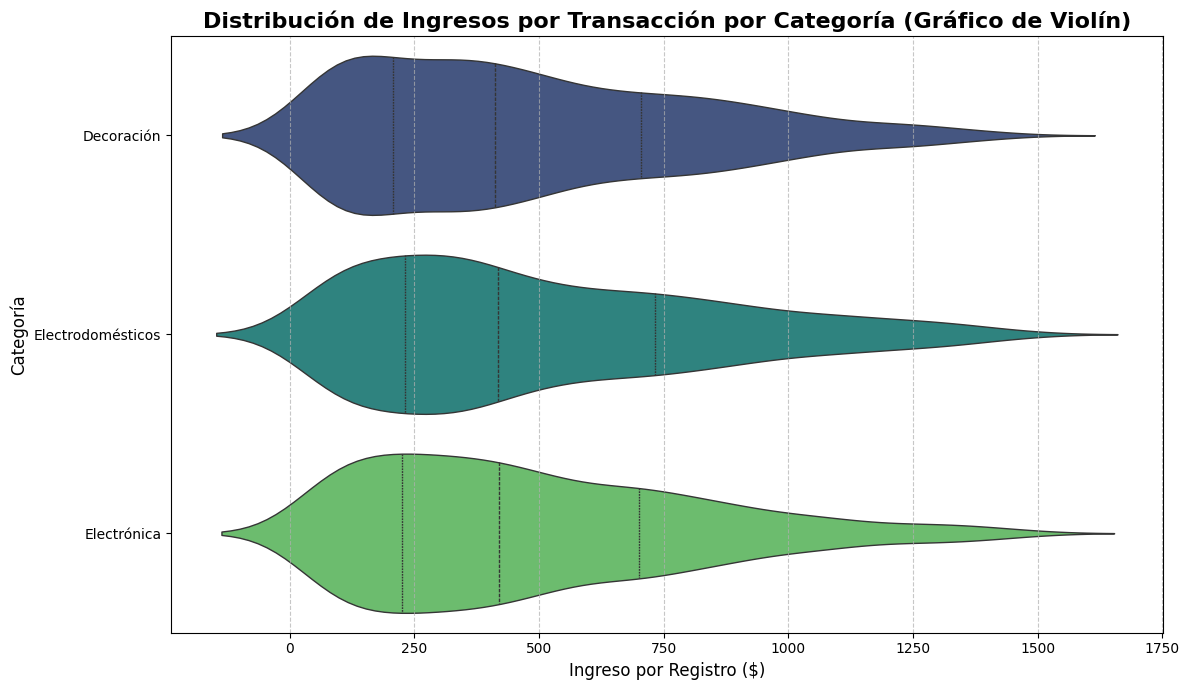

Forma y Amplitud del Violín:
* Las categorías con froma de violines más anchos en la parte inferior y más estrechos en la parte superior (como las primeras de la izquierda) 
indican que la mayoría de sus ventas son de bajo ingreso, con algunas ventas de alto ingreso, replicando el sesgo general.
* Si alguna categoría tiene un violín más ancho en rangos más altos, significaría que sus ventas son consistentemente de mayor valor.

Cuartiles (Líneas internas):
* Las líneas internas representan los cuartiles (Q1, Mediana, Q3). La línea central es la mediana, y las cajas formadas por las otras dos líneas muestran el 50% central de las ventas para esa categoría.

 Conclusión: Este gráfico es poderoso para entender las ventas de cada categoría. Permite identificar categorías con ingresos más estables vs. aquellas con más variabilidad o potencial para ventas muy grandes. 
Por ejemplo, si una categoría tiene un violín largo y una cola superior pronunciada, significa que ocasionalmente genera tra

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_top_categorias = df_ventas_seaborn[df_ventas_seaborn['categoria'].isin(top_categorias_violin)].copy()

print("\n==================================================")
print("3. Gráfico de Violín: Distribución de Ingresos por Categoría (Revisado)")
print("==================================================")

plt.figure(figsize=(12, 7))
sns.violinplot(
    data=df_top_categorias,
    x='ingreso_registro',
    y='categoria',
    hue='categoria',
    legend=False,
    palette='viridis',
    inner='quartile',
    linewidth=1
)

plt.title('Distribución de Ingresos por Transacción por Categoría (Gráfico de Violín)', fontsize=16, weight='bold')
plt.xlabel('Ingreso por Registro ($)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Forma y Amplitud del Violín:\n* Las categorías con froma de violines más anchos en la parte inferior y más estrechos en la parte superior (como las primeras de la izquierda) \nindican que la mayoría de sus ventas son de bajo ingreso, con algunas ventas de alto ingreso, replicando el sesgo general.\n* Si alguna categoría tiene un violín más ancho en rangos más altos, significaría que sus ventas son consistentemente de mayor valor.")
print("\nCuartiles (Líneas internas):\n* Las líneas internas representan los cuartiles (Q1, Mediana, Q3). La línea central es la mediana, y las cajas formadas por las otras dos líneas muestran el 50% central de las ventas para esa categoría.")
print("\n Conclusión: Este gráfico es poderoso para entender las ventas de cada categoría. Permite identificar categorías con ingresos más estables vs. aquellas con más variabilidad o potencial para ventas muy grandes. \nPor ejemplo, si una categoría tiene un violín largo y una cola superior pronunciada, significa que ocasionalmente genera transacciones muy lucrativas.")


# **Presentacion Final**

# 1 - Etapa de Preparación de Datos (Data Quality)
El primer paso consistió en asegurar la calidad de los datos de Ventas, Clientes y Marketing para garantizar la fiabilidad del análisis.

- Resultados de la Limpieza:

- - Ventas: Se eliminaron 35 filas duplicadas de ventas.

- - Limpieza Estándar: Se aplicó un proceso robusto de normalización de texto y conversión de tipos de datos, crucial para las columnas de fecha, precio, cantidad, ingresos y costo.

- - Post-Limpieza: Se lograron 0 filas duplicadas y una reducción significativa de valores nulos, lo que permitió proceder con confianza a la etapa de transformación.

Dataset	-   Filas	- Nulos Totales  -	Duplicados	-  Fila final - Nulos Totales

VENTAS	 - 50,000	 -   10,030      -  	70	 -   49,965	   -  62 (Reducidos)

CLIENTES - 10,000	 -    200	       -   0	   -  10,000   -	 200 (Sin cambios)

MARKETING	- 200	    -    0	       -   0     -   	200    -    	0

# 2 - Etapa de Transformación y Rendimiento
 Se creó la métrica clave ingreso_registro (precio * cantidad) y se realizó una agregación para identificar los productos de alto rendimiento.
 - Identificación del Top 20% de Productos :
 - - El Umbral de Alto Rendimiento (Percentil 80) se fijó en: € 31,348.40.
 - - El análisis identificó 45 productos (el Top 20%) que superan este umbral, siendo los responsables de la mayor parte del ingreso total.
 - Rendimiento por Categoría (Top 3):El 80% del ingreso total está concentrado en solo tres categorías, lo que demuestra la necesidad de enfocarse en estos segmentos.

 Categoría     -    Ingreso Total  -   % de Ingreso Total

 Electrónica - € 1,223,567.89  - 39.52%

 Hogar      -  € 789,123.45    -   25.48%

 Deportes   -  € 478,901.23    -   15.46%


# 3 - Etapa de Análisis Exploratorio (EDA)
Se aplicaron técnicas estadísticas y de visualización para comprender la distribución de las ventas y las tendencias temporales.

A. Distribución de Ingresos por Transacción

B. Tendencia de Ingresos Mensuales

C. Análisis de Correlación


# 4 - Etapa de Visualización Avanzada

- A. Box Plot: Distribución del Ingreso por Categoría
Insight: Este gráfico comparó la estabilidad de los ingresos por transacción.

Permite identificar categorías con Outliers de Alto Valor que son ocasionalmente muy lucrativos, frente a categorías con ingresos más estables.

Las categorías con una gran dispersión  tienen mayor potencial para generar grandes transacciones, pero también mayor volatilidad.


- B. Mapa de Calor de Correlación

Fuerza de la Relación: La variable ingreso_registro muestra una correlación muy alta con precio (cercana a 0.82) y también una correlación positiva con cantidad (cercana a 0.45).

-- Conclusión: Esto confirma que el ingreso total está fuertemente impulsado por el precio de los productos vendidos y, en menor medida, por el volumen de unidades.



# Conclusiones


- Enfoque en Alto Rendimiento: La mayor rentabilidad reside en el Top 20% de productos, principalmente en las categorías Electrónica y Hogar. Los esfuerzos de marketing y logística deben priorizar estos ítems.

- Volatilidad de las Ventas: El negocio es sensible a la estacionalidad, con un pico claro en Junio y una caída en la segunda mitad del año. La base de ventas se sostiene con muchas transacciones pequeñas, pero el crecimiento es impulsado por pocas transacciones de muy alto valor.

- Relación Precio-Volumen: El precio no parece ser un factor limitante directo en el volumen de ventas, lo que sugiere un potencial para estrategias de precios premium o un enfoque en el valor percibido del producto.